In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
#dataset link : 'https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset'
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [114]:
df.shape

(569, 32)

In [115]:
df.drop('id',axis=1,inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [117]:
features = df.drop('diagnosis',axis=1)
stats = features.describe().T
stats['Skewness'] = features.skew()
stats

,count,mean,std,min,25%,50%,75%,max,Skewness
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,0.942380
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,0.650450
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,0.990650
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,1.645732
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.456324
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,1.190123
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,1.401180
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,1.171180
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.725609
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,1.304489


<Axes: xlabel='diagnosis', ylabel='count'>

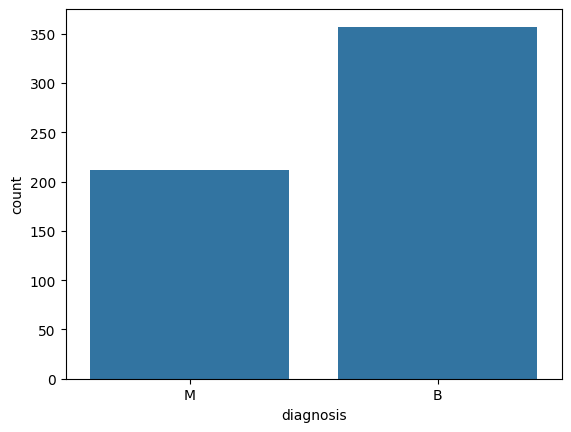

In [118]:
# Bar-plot for Diagnosis
sns.countplot(x=df['diagnosis'])

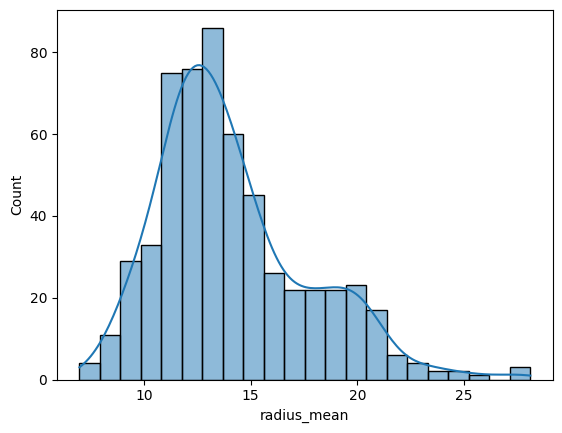

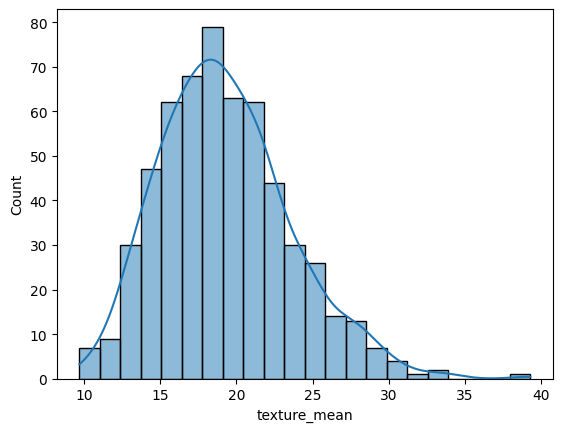

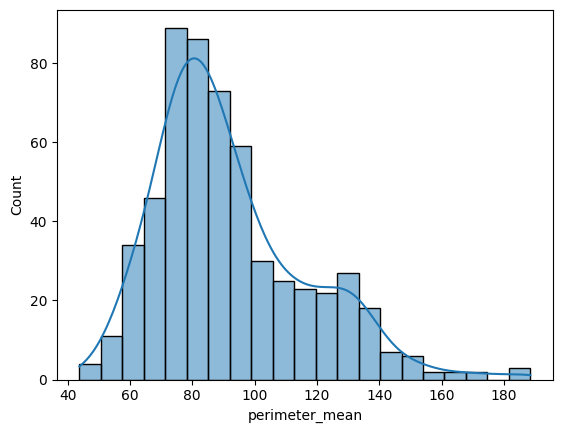

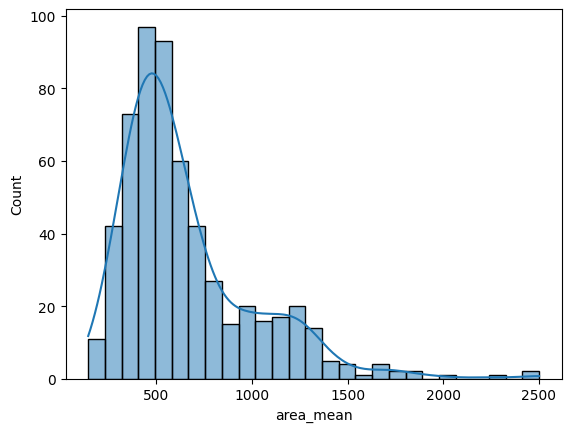

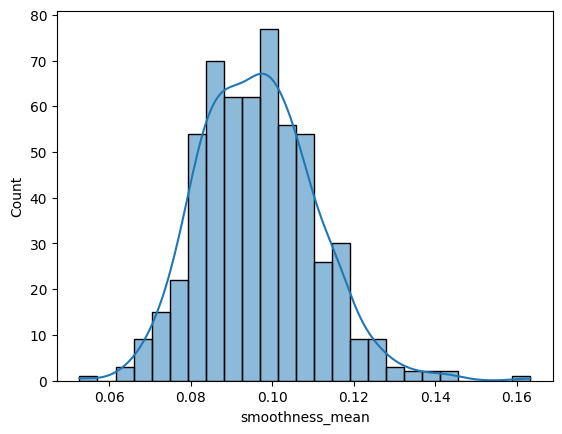

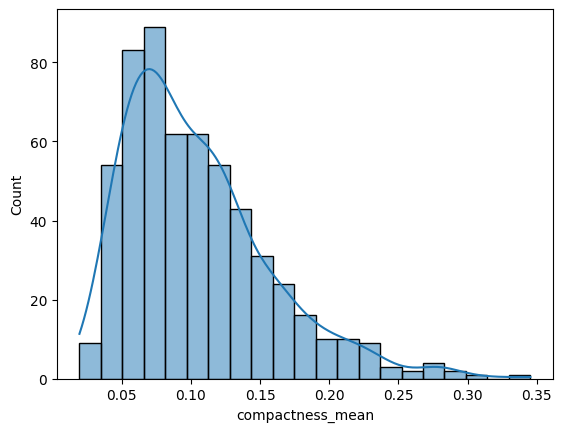

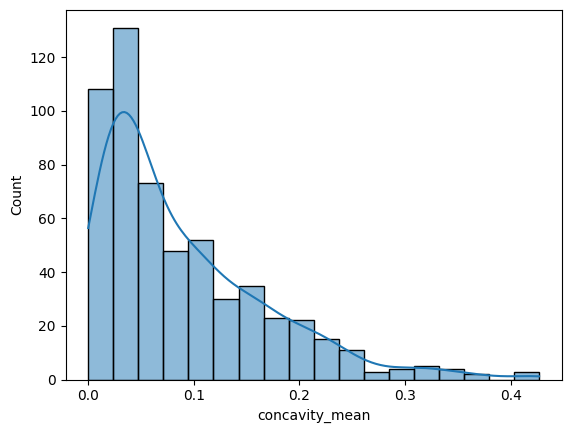

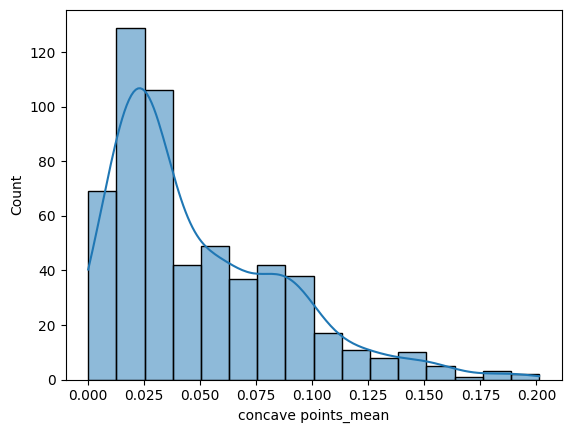

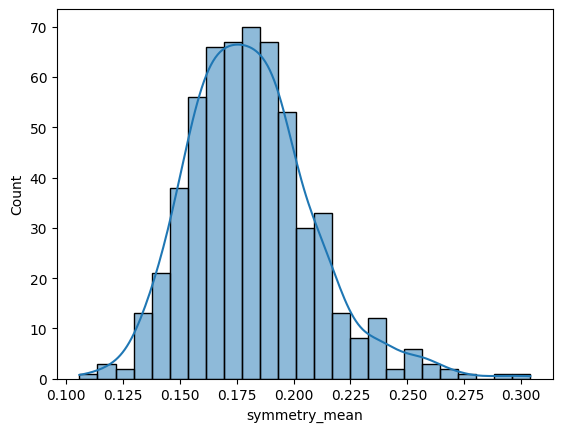

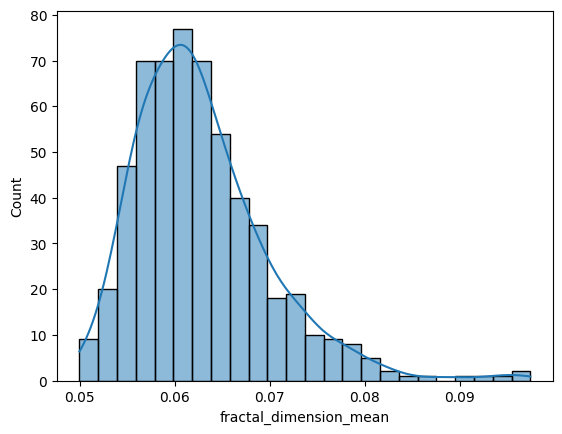

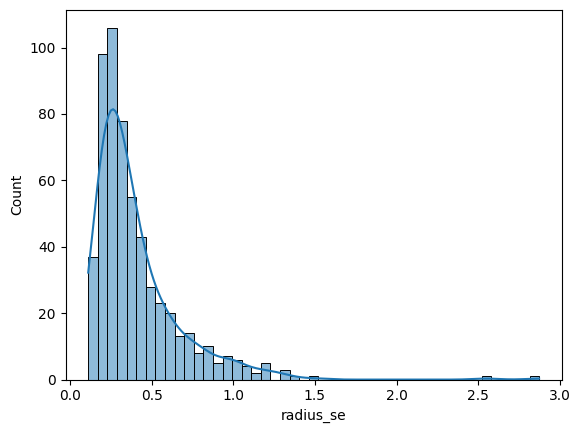

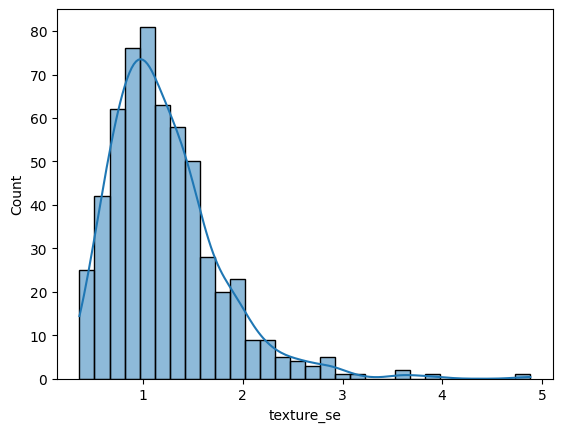

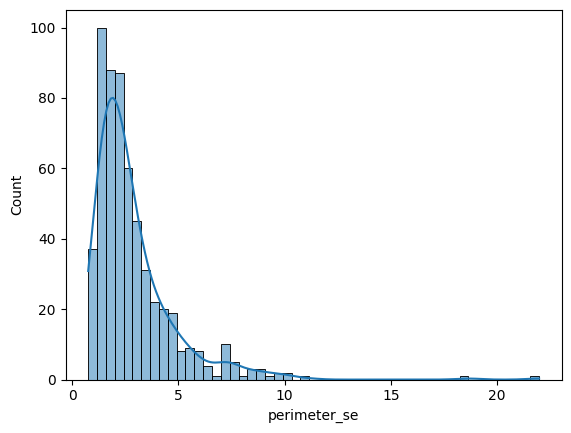

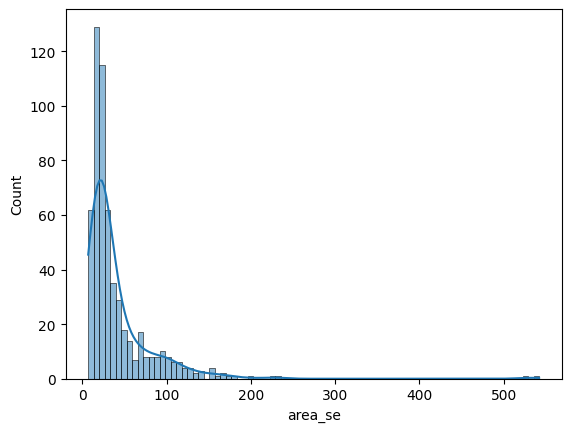

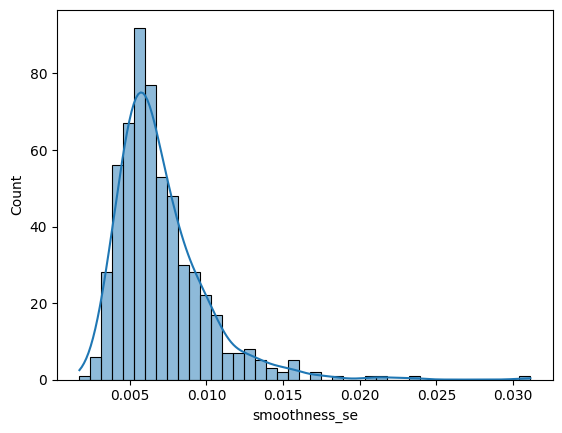

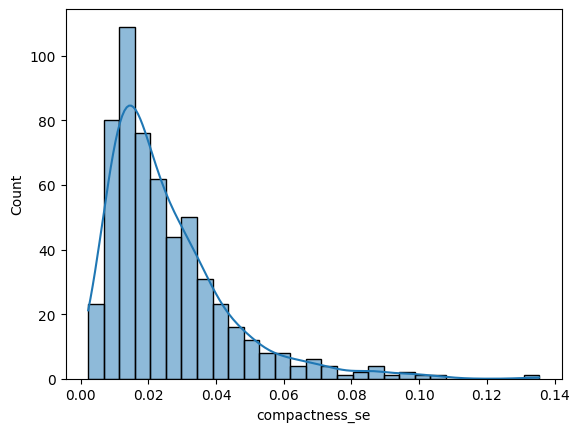

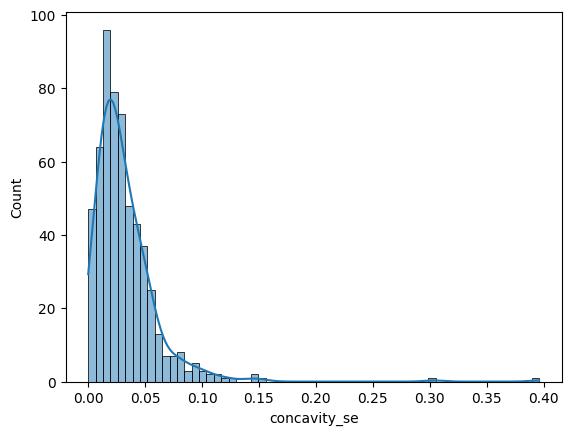

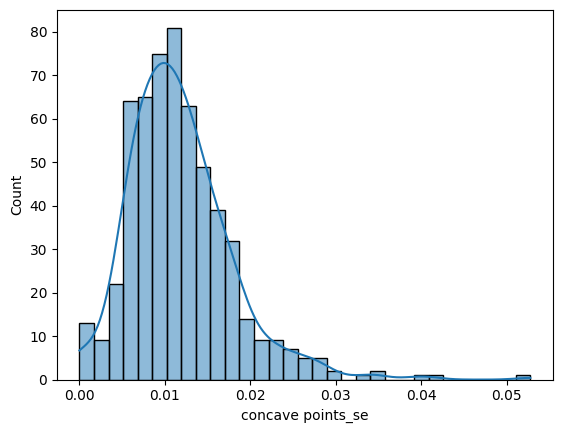

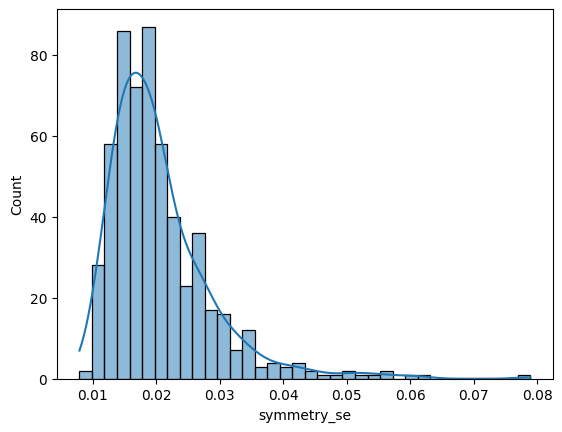

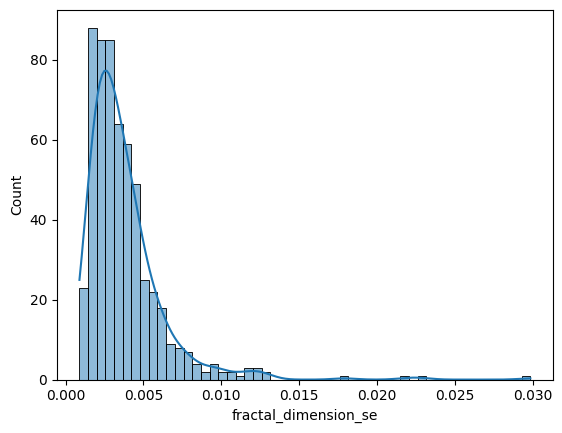

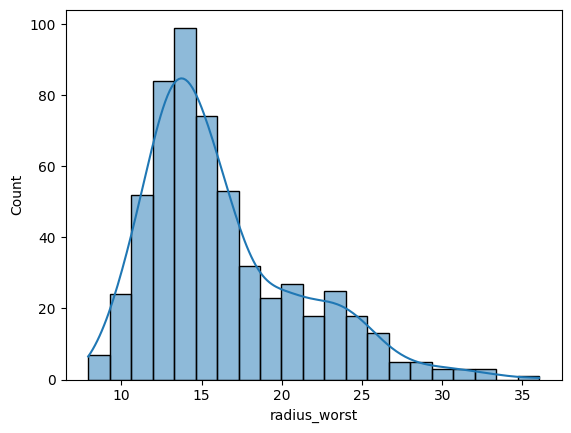

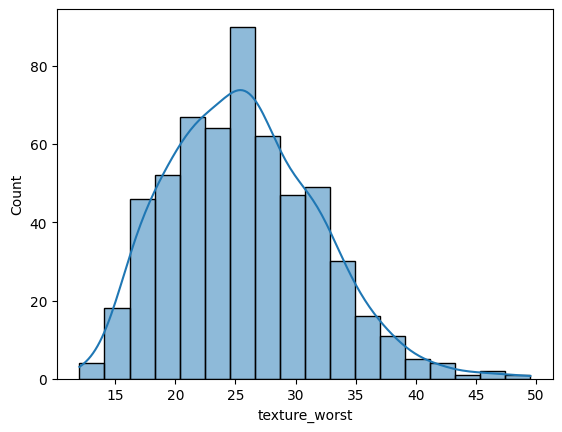

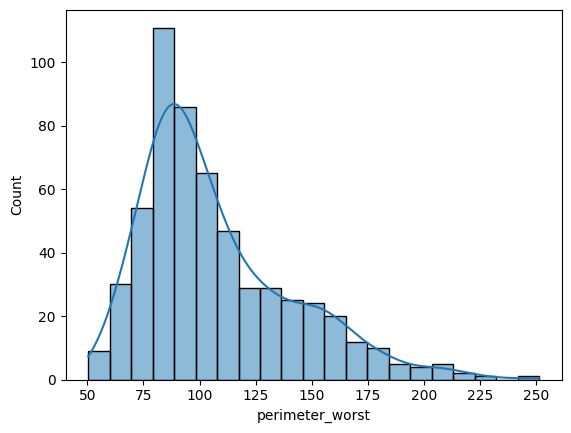

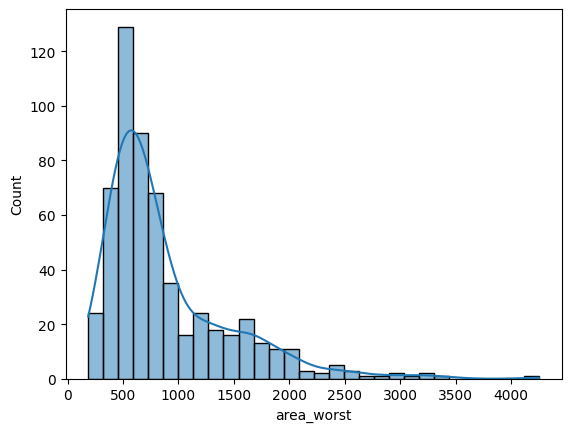

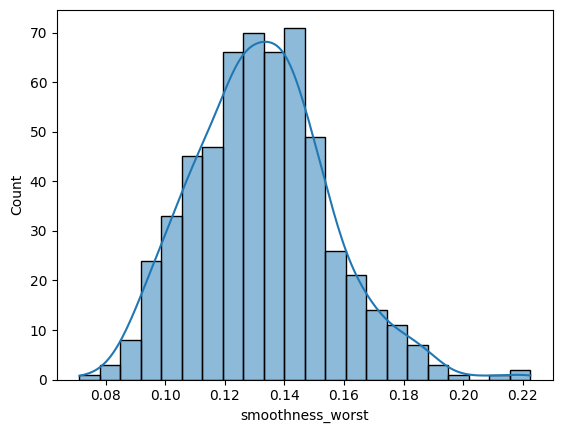

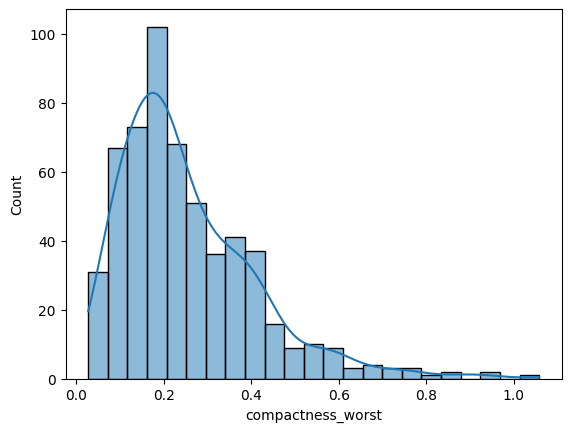

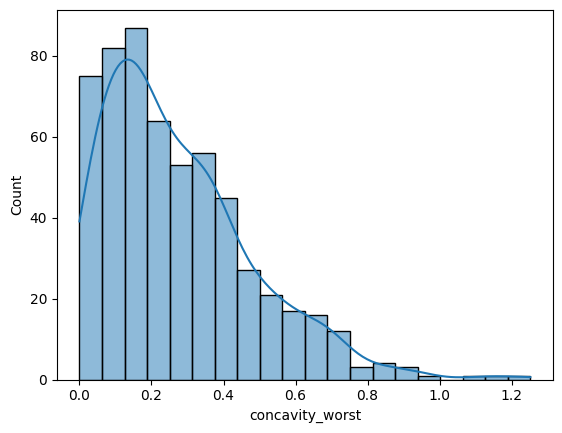

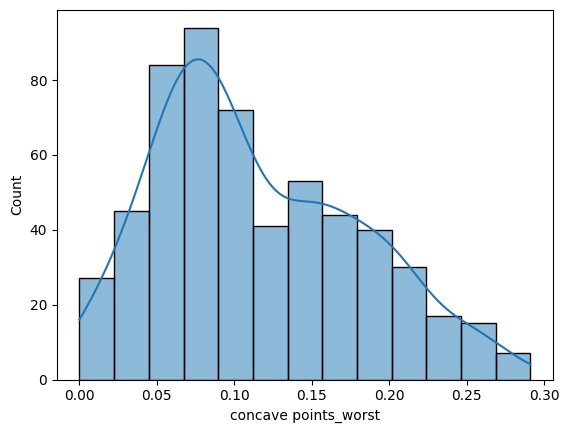

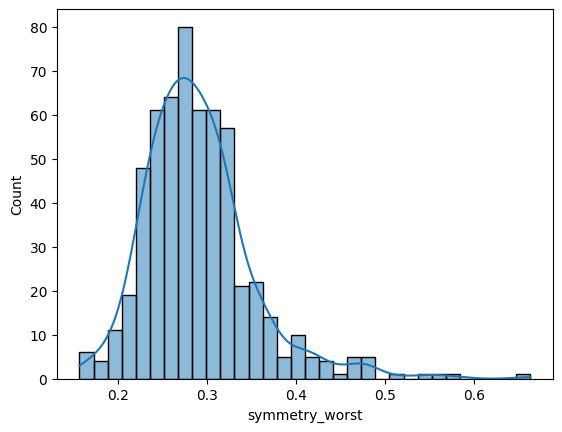

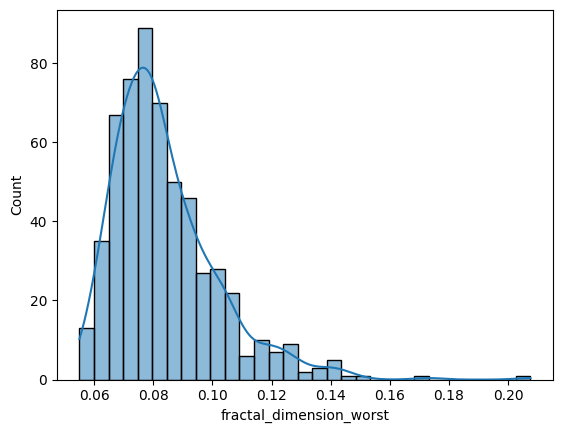

In [119]:
for col in features.columns:
  sns.histplot(x=df[col],kde=True)
  plt.show()

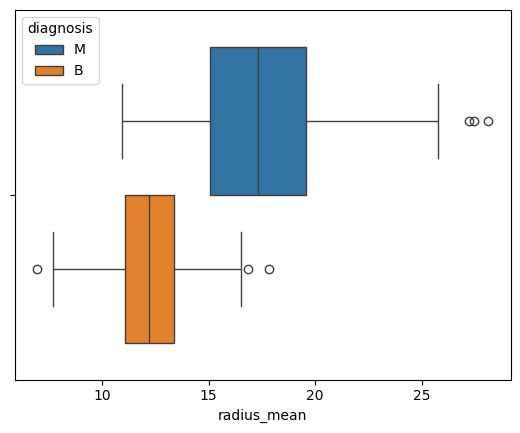

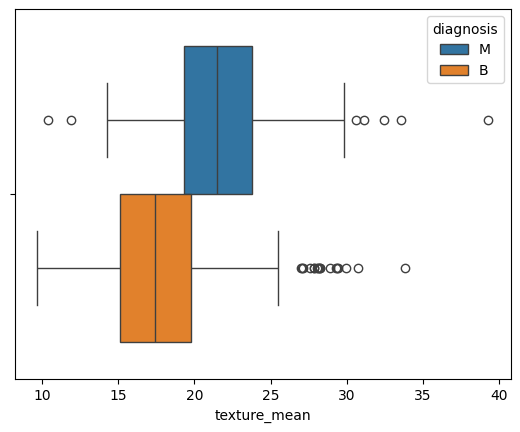

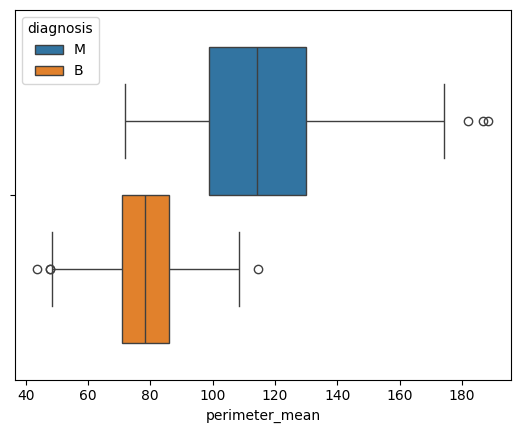

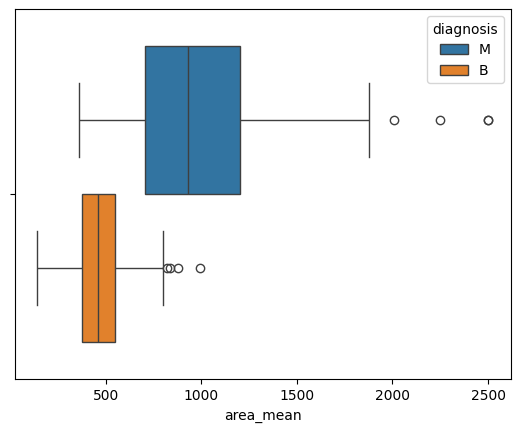

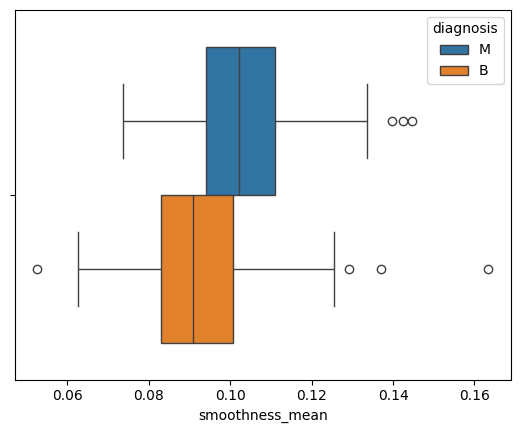

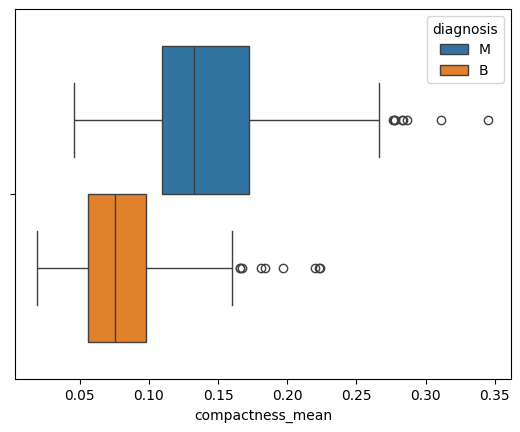

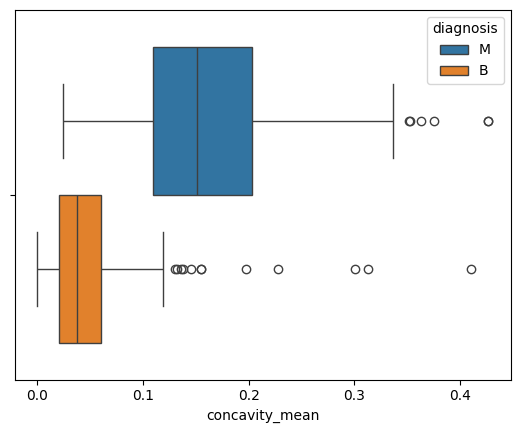

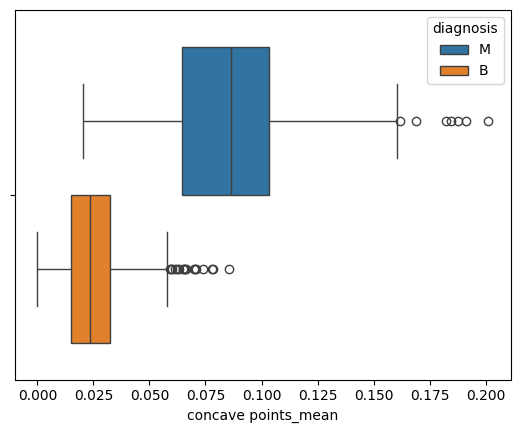

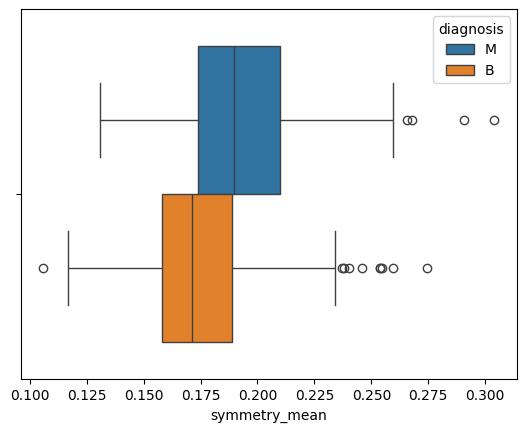

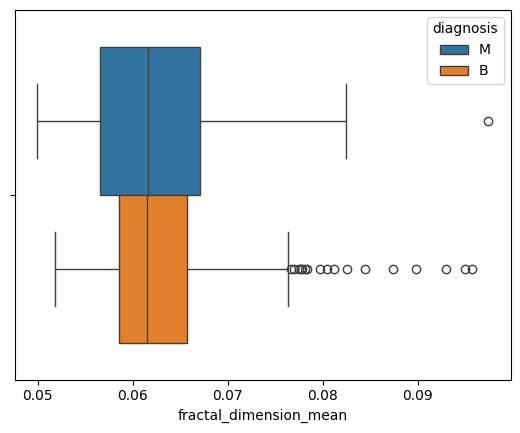

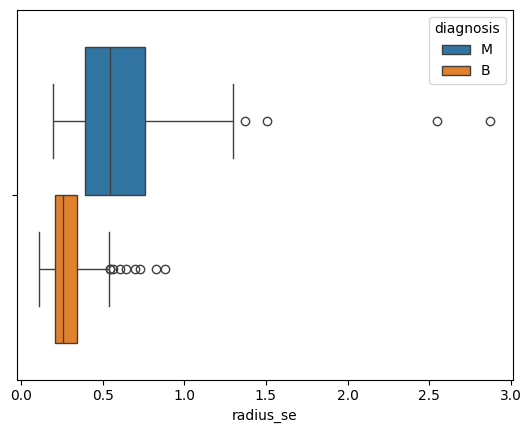

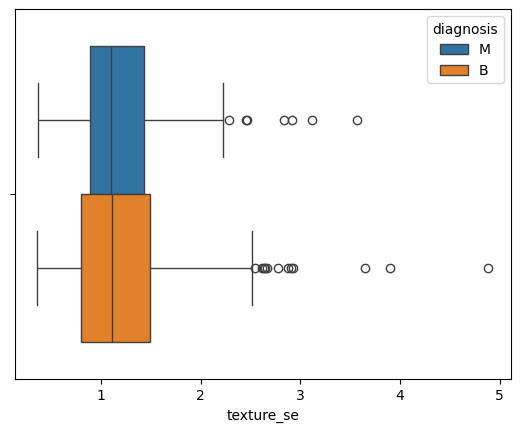

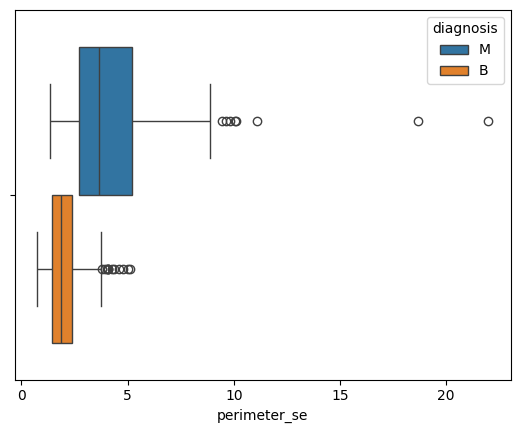

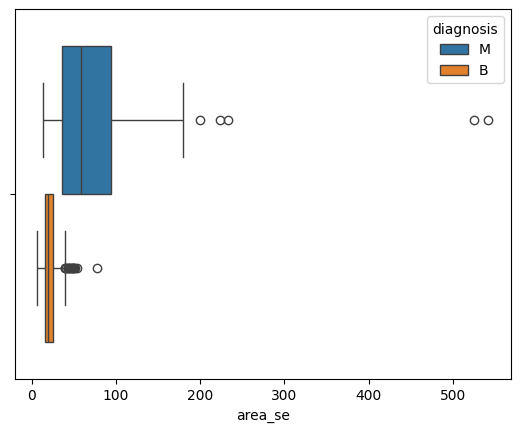

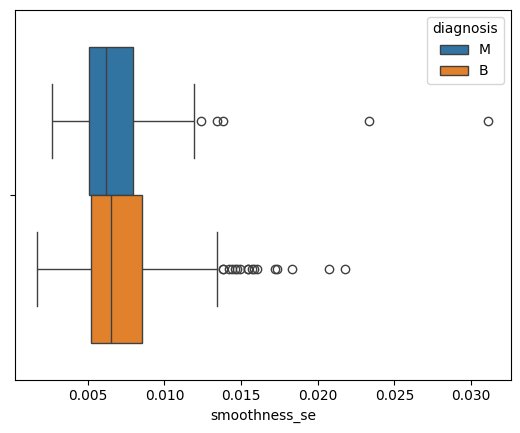

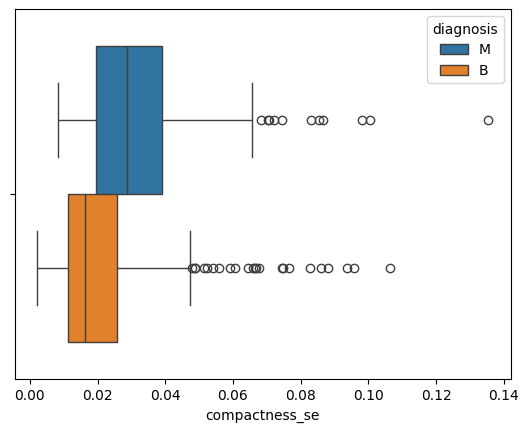

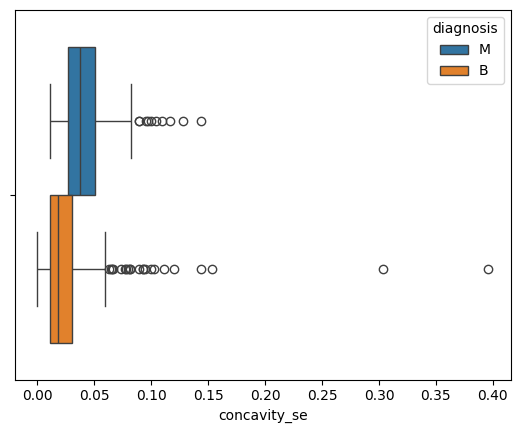

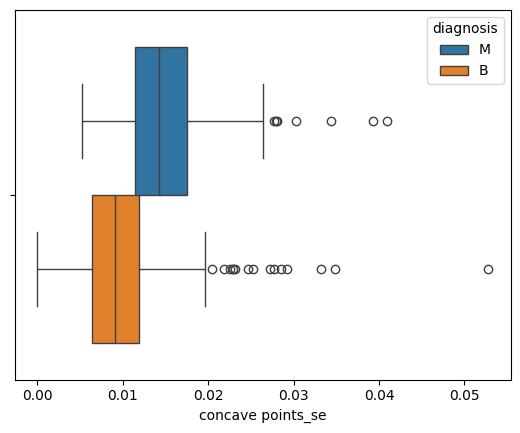

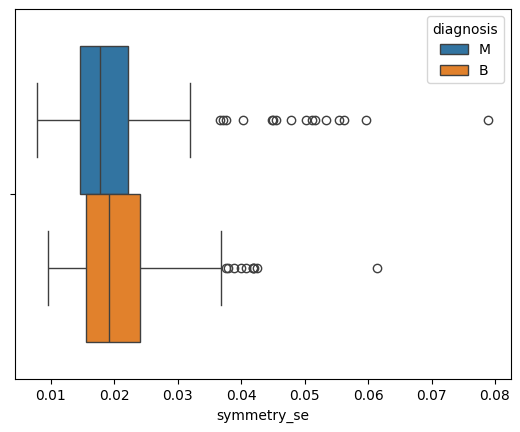

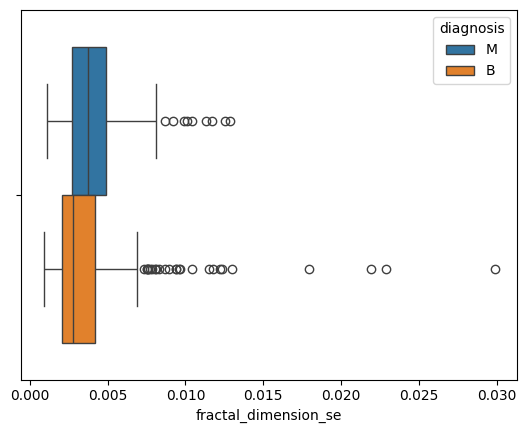

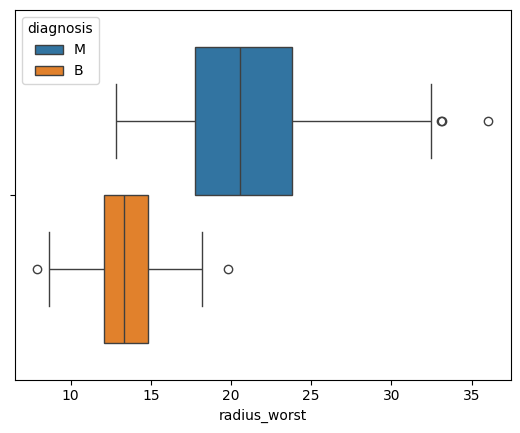

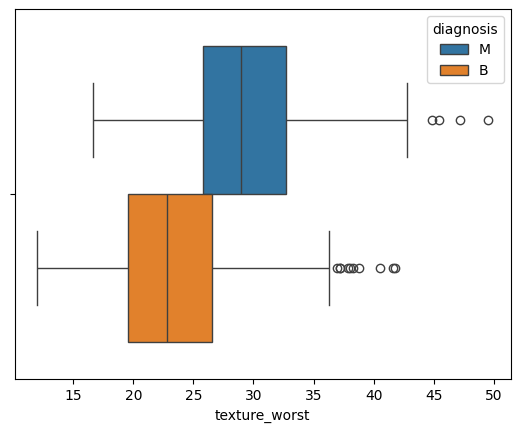

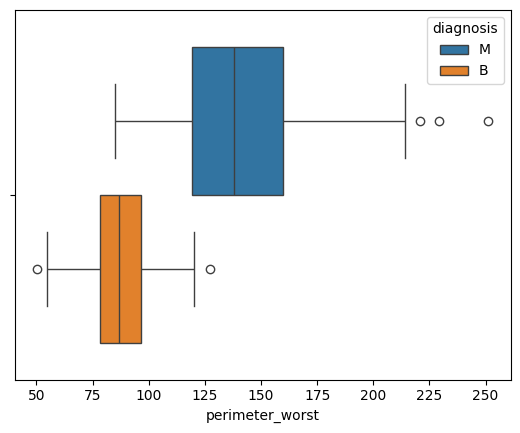

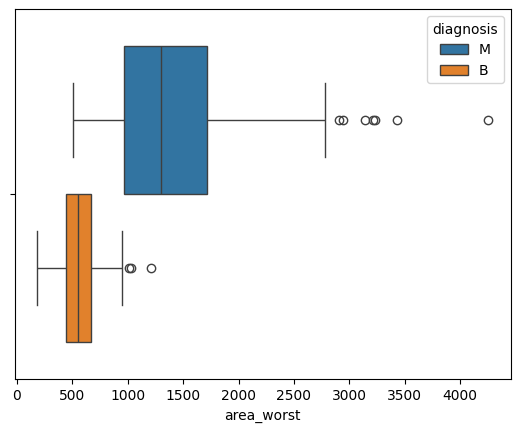

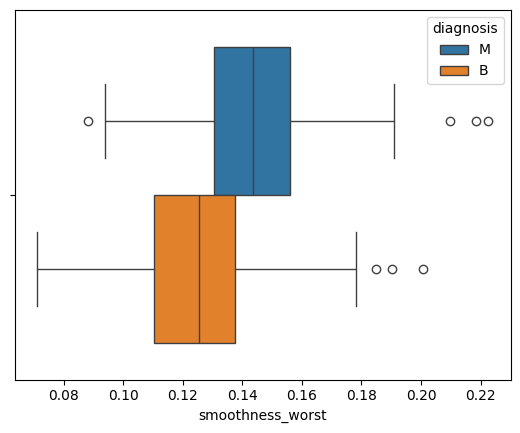

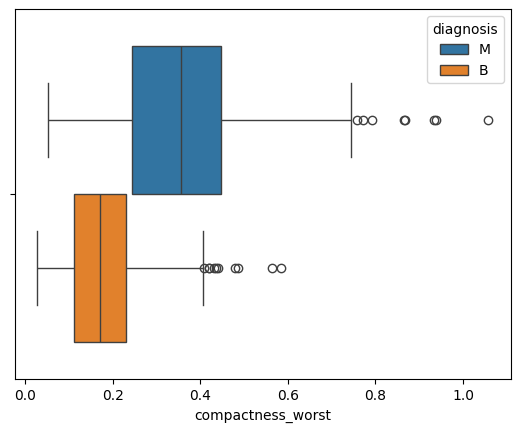

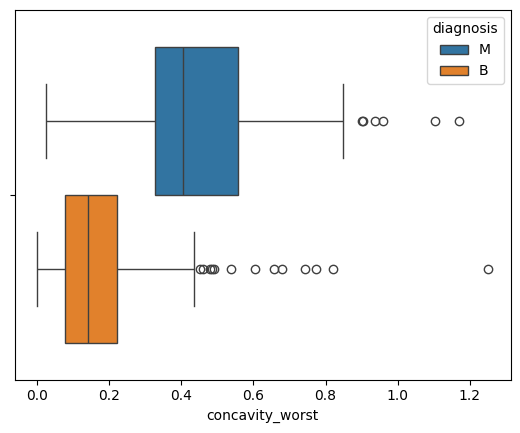

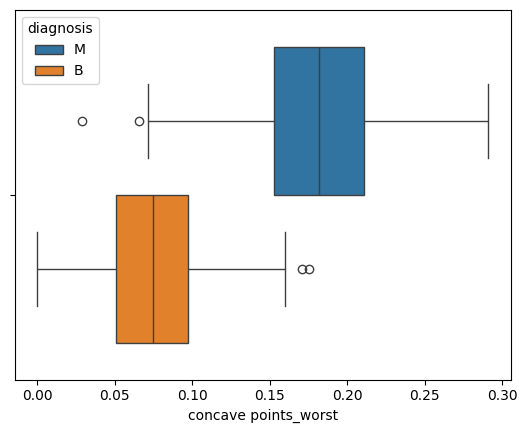

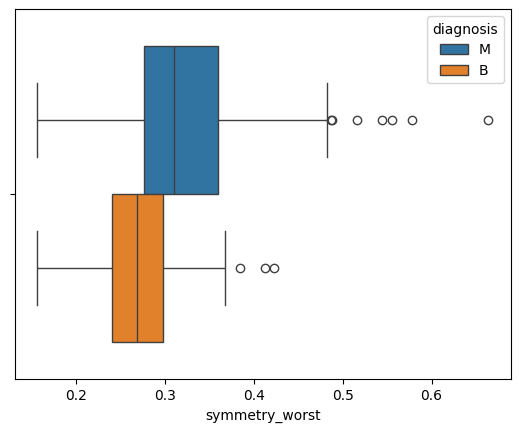

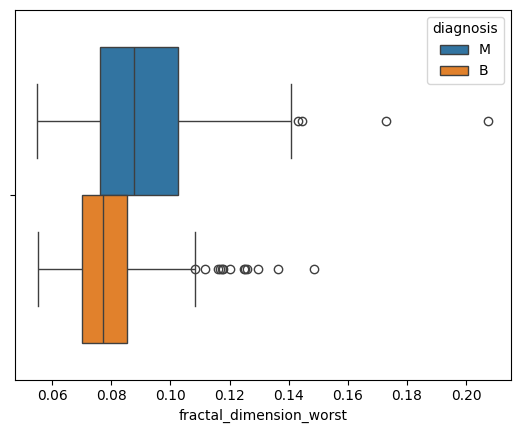

In [120]:
for col in features.columns:
  sns.boxplot(x=df[col],hue=df['diagnosis'])
  plt.show()

In [121]:
features_M = df[df['diagnosis'] == 'M'].drop('diagnosis', axis=1)
features_B = df[df['diagnosis'] == 'B'].drop('diagnosis', axis=1)

# Cap outliers for B diagnosis features
def cap_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  return df

for col in features_B.columns:
  features_B = cap_outliers(features_B, col)

features_processed = pd.concat([features_M, features_B], axis=0)

In [122]:
df1 = pd.concat([features_processed,df['diagnosis']],axis=1)
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


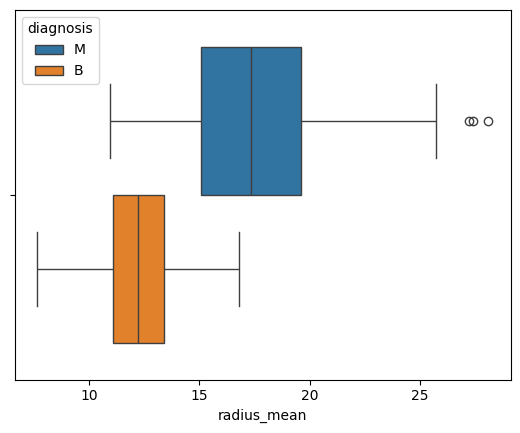

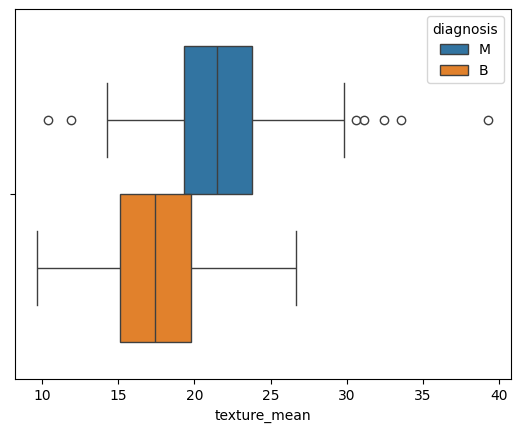

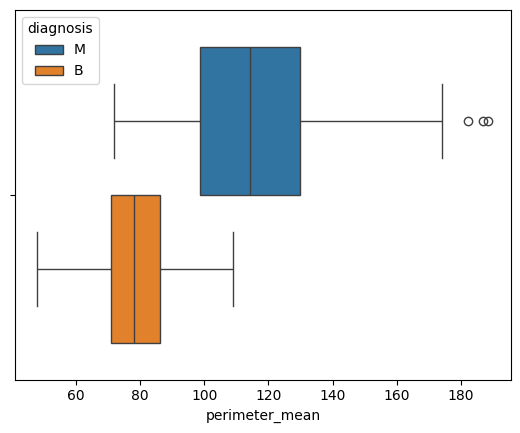

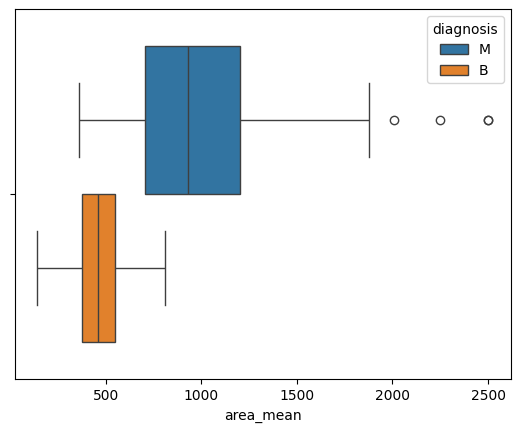

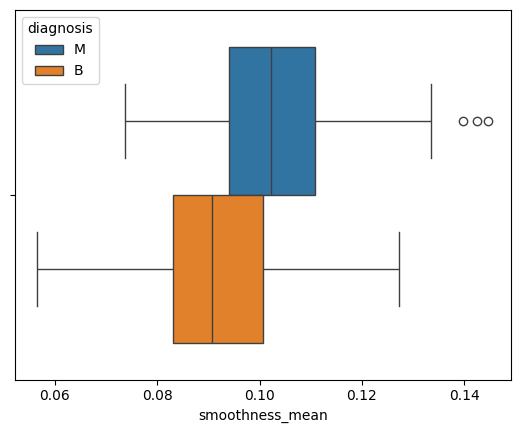

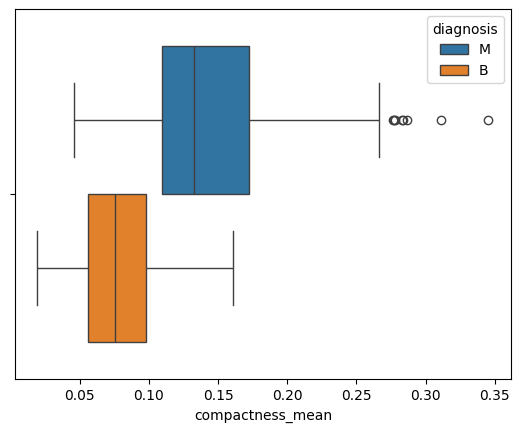

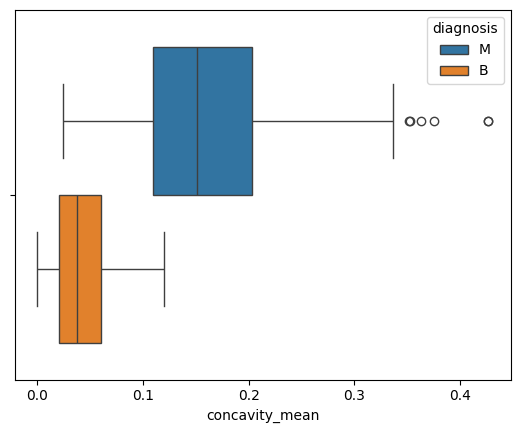

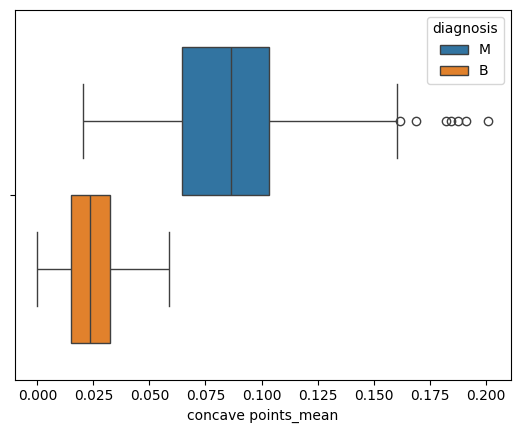

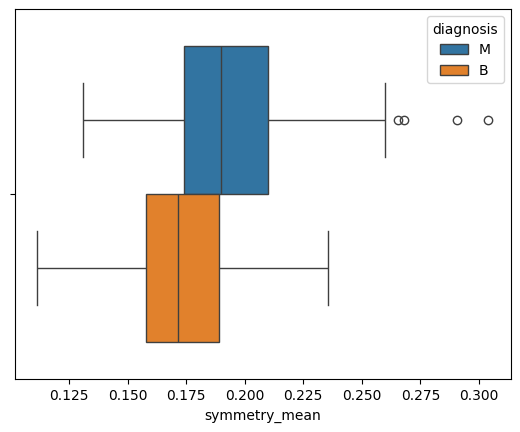

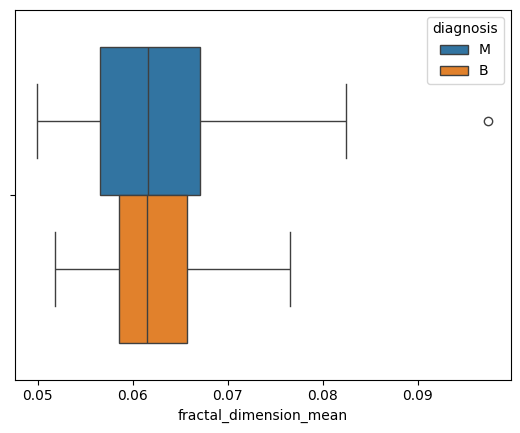

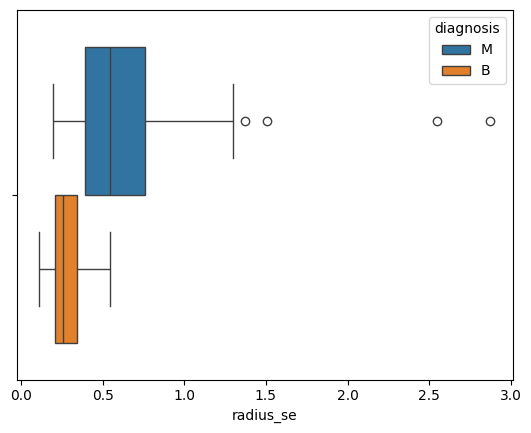

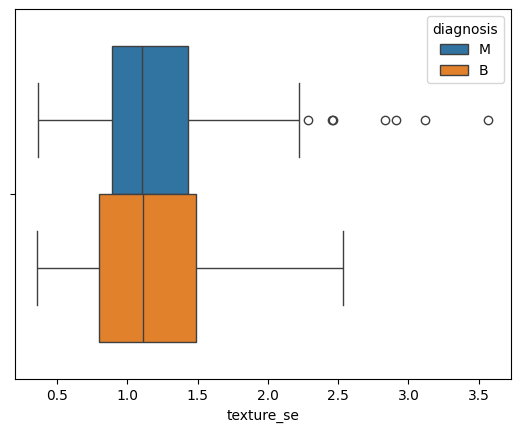

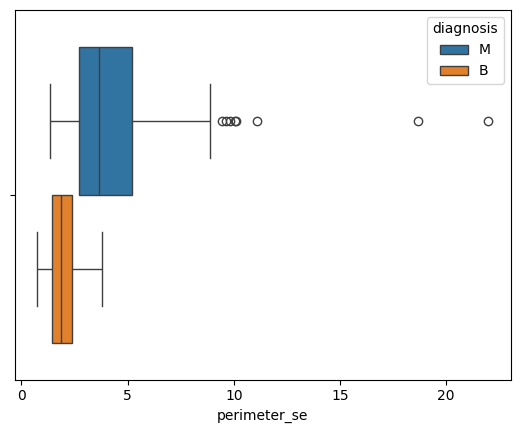

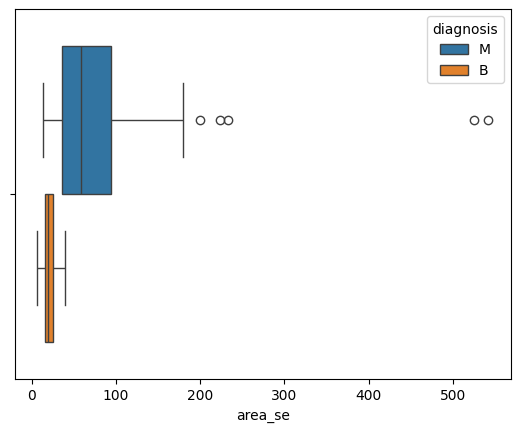

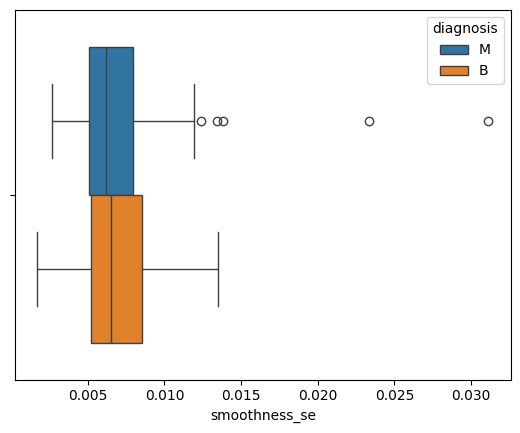

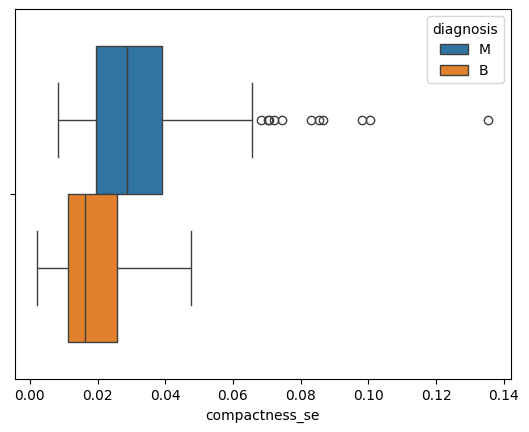

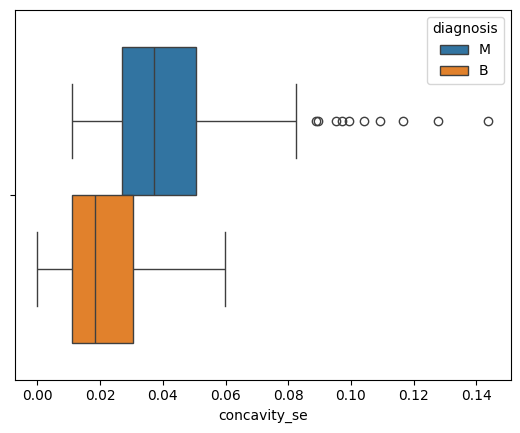

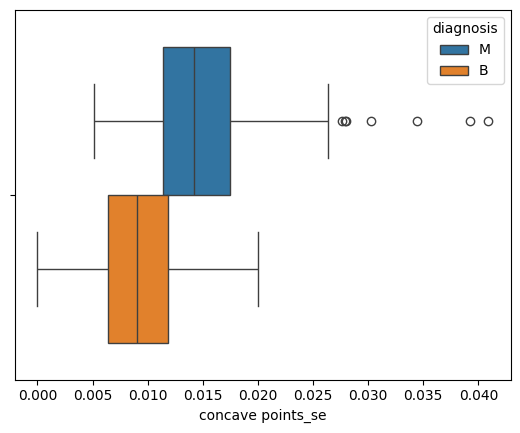

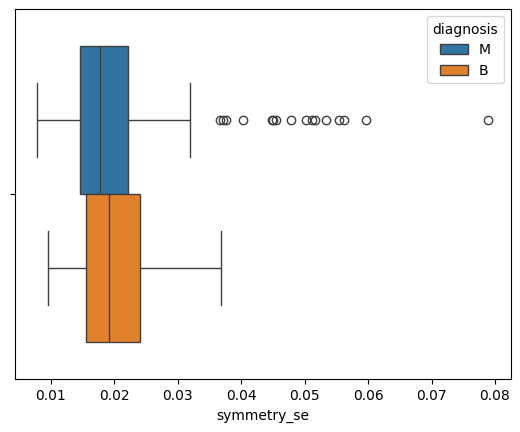

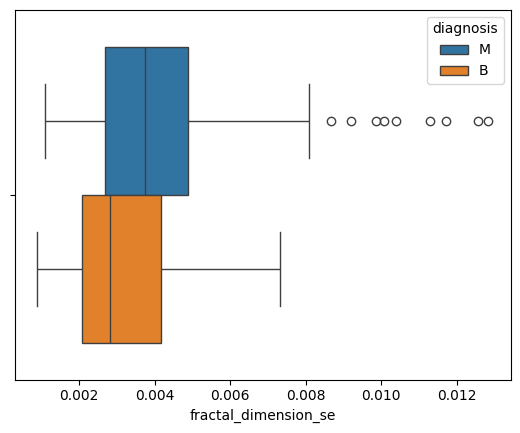

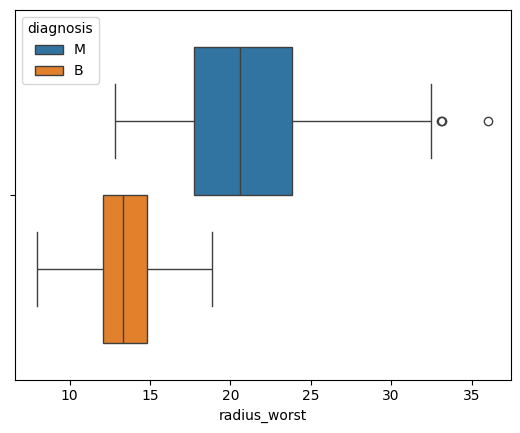

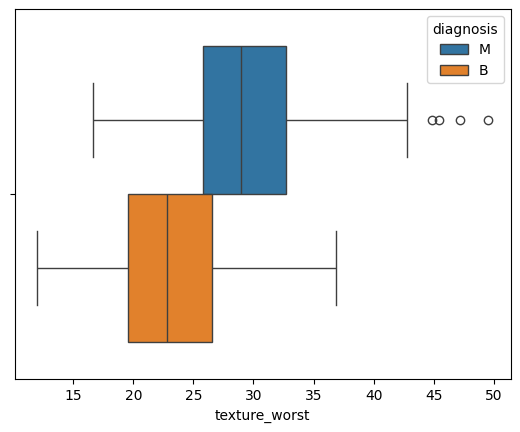

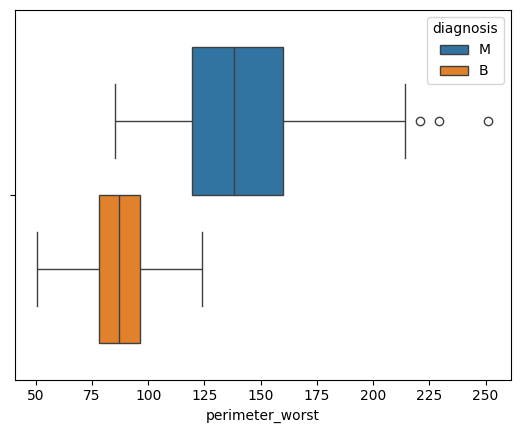

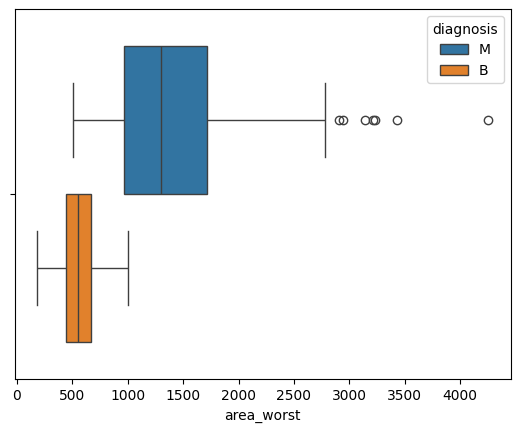

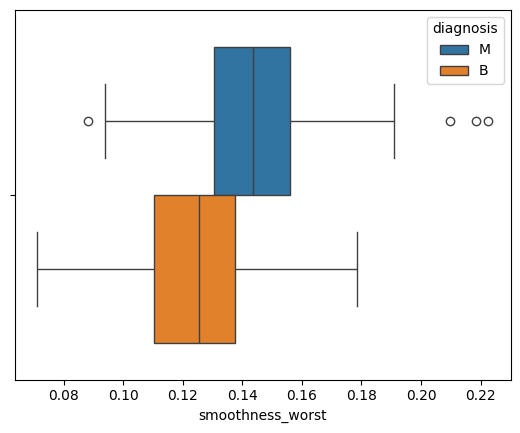

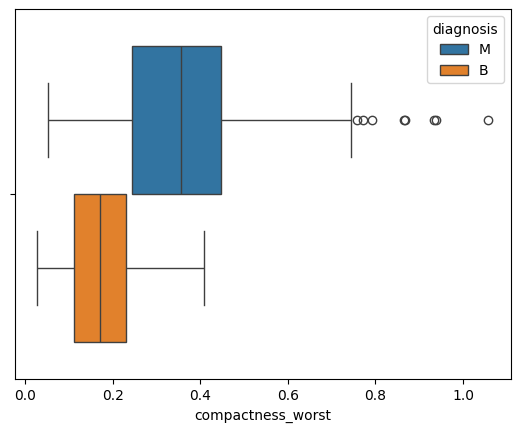

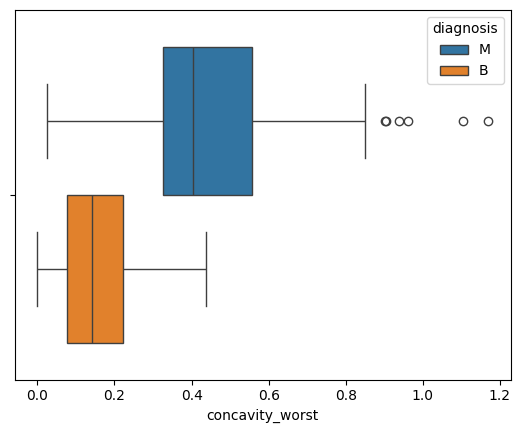

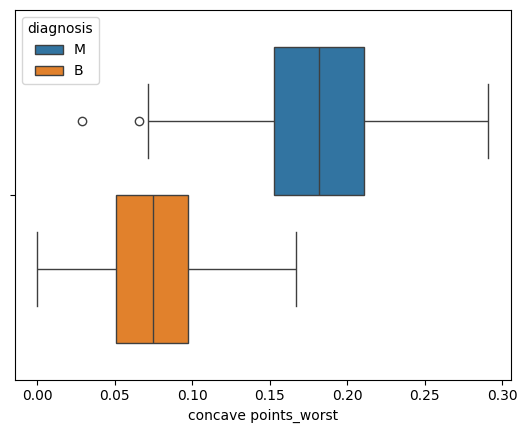

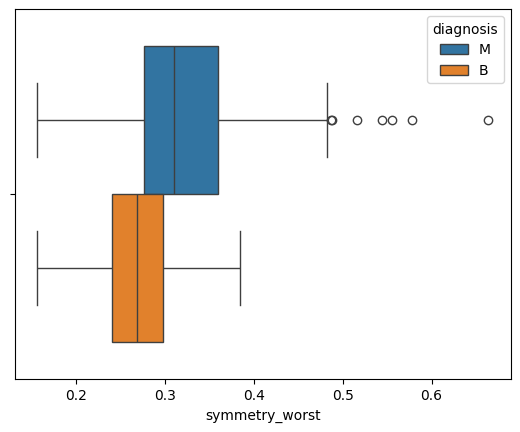

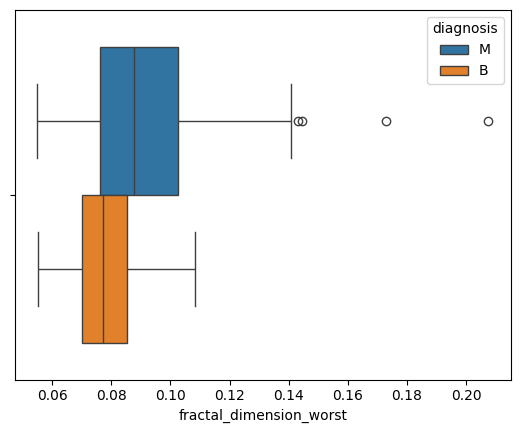

In [123]:
for col in features.columns:
  sns.boxplot(x=df1[col],hue=df1['diagnosis'])
  plt.show()

In [124]:
df1['diagnosis'] = df1['diagnosis'].map({'M':1,'B':0})
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X = df1.drop('diagnosis',axis=1)
y = df1['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(50.722222222222214, 0.5, 'Actual')

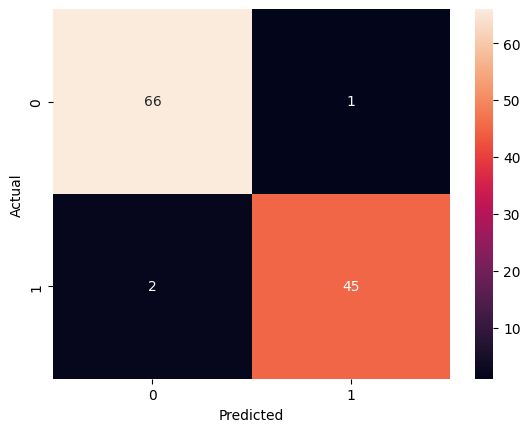

In [126]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = SVC()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(50.722222222222214, 0.5, 'Actual')

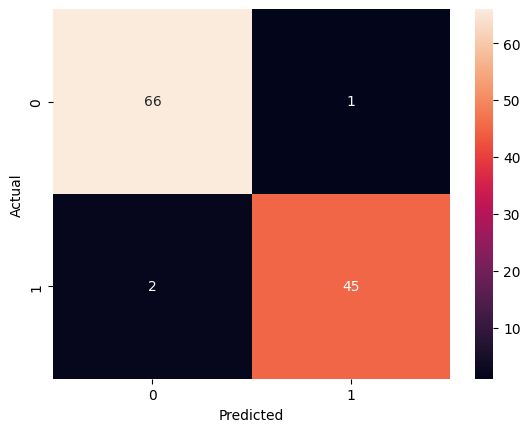

In [127]:
# Using RBF kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_scaled,y_train)
y_pred_rbf = model.predict(X_test_scaled)

print(accuracy_score(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))
cm = confusion_matrix(y_test,y_pred_rbf)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

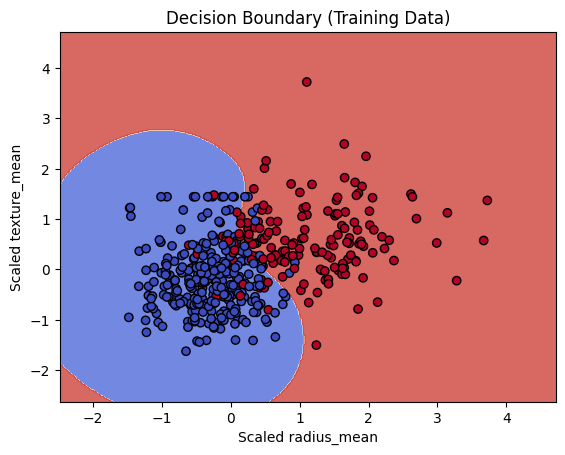

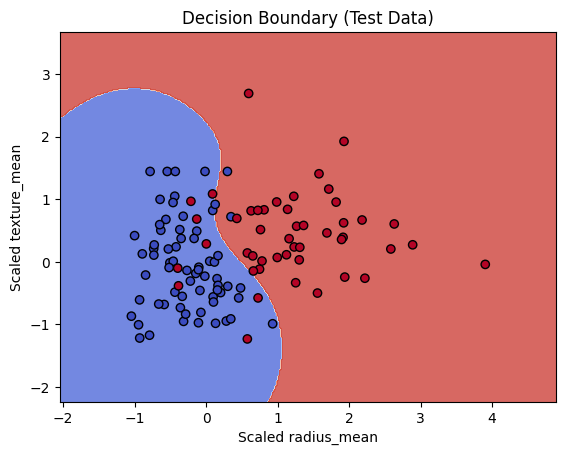

In [128]:
# Visualizing decision boundary using 2D data

X_2d = df1[['radius_mean', 'texture_mean']]
y_2d = df1['diagnosis']

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42)

scaler_2d = RobustScaler()
X_train_scaled_2d = scaler_2d.fit_transform(X_train_2d)
X_test_scaled_2d = scaler_2d.transform(X_test_2d)

model_2d = SVC(kernel='rbf')
model_2d.fit(X_train_scaled_2d, y_train_2d)

def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Scaled radius_mean')
    plt.ylabel('Scaled texture_mean')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_train_scaled_2d, y_train_2d, model_2d, 'Decision Boundary (Training Data)')

plot_decision_boundary(X_test_scaled_2d, y_test_2d, model_2d, 'Decision Boundary (Test Data)')

In [129]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 3, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 3, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

Best parameters: {'C': 1, 'gamma': 0.1}
Best score: 0.9824175824175825
Grid Search Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



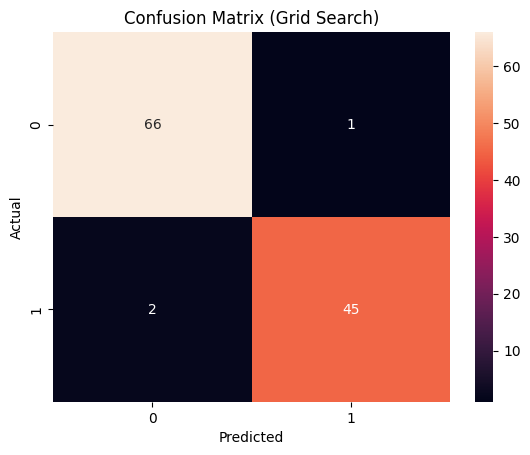

In [130]:
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

grid_predictions = grid.predict(X_test_scaled)

print("Grid Search Accuracy:", accuracy_score(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

cm_grid = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm_grid, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Grid Search)')
plt.show()

In [131]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

scores_rbf = cross_val_score(model_rbf, X_train_scaled, y_train, cv=5)

print("Cross-validation scores (RBF kernel):", scores_rbf)
print("Mean cross-validation score (RBF kernel):", scores_rbf.mean())

best_model = grid.best_estimator_
scores_best_model = cross_val_score(best_model, X_train_scaled, y_train, cv=5)

print("Cross-validation scores (Best Grid Search Model):", scores_best_model)
print("Mean cross-validation score (Best Grid Search Model):", scores_best_model.mean())


Cross-validation scores: [0.97802198 1.         0.97802198 0.95604396 0.96703297]
Mean cross-validation score: 0.9758241758241759
Cross-validation scores (RBF kernel): [0.97802198 1.         0.97802198 0.95604396 0.96703297]
Mean cross-validation score (RBF kernel): 0.9758241758241759
Cross-validation scores (Best Grid Search Model): [0.97802198 1.         0.97802198 0.97802198 0.97802198]
Mean cross-validation score (Best Grid Search Model): 0.9824175824175825



# **Note**
This is just an experiment
*   Till here we have done all the essensial tasks using SVM classifier, but the main point is in the handling of outliers, I capped all outliers of 'B' category diagnosis and kept the 'M' category outliers as it is.
*   Now i am going to use Robust Scaler directly and then will check performance of the SVM



In [132]:
X1 = df2.drop('diagnosis',axis=1)
y1 = df1['diagnosis']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)

0.6666666666666666
              precision    recall  f1-score   support

           0       0.65      0.93      0.77        67
           1       0.74      0.30      0.42        47

    accuracy                           0.67       114
   macro avg       0.69      0.61      0.59       114
weighted avg       0.69      0.67      0.62       114



Text(50.722222222222214, 0.5, 'Actual')

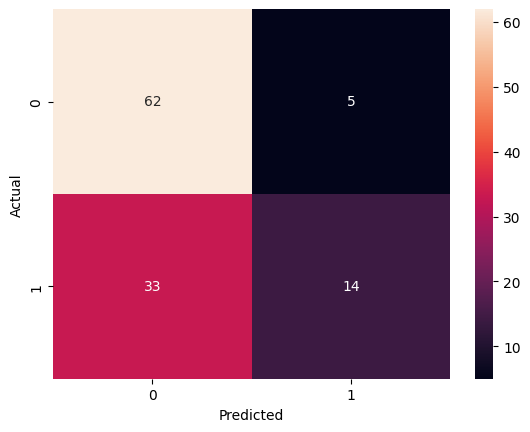

In [133]:
model1 = SVC(kernel='rbf')
model1.fit(X_train_scaled,y1_train)
y_pred1 = model1.predict(X_test_scaled)

print(accuracy_score(y1_test,y_pred1))
print(classification_report(y1_test,y_pred1))
cm1 = confusion_matrix(y1_test,y_pred1)
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')